In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, roc_curve, auc
from sklearn.datasets import make_classification
%config IPCompleter.greedy=True
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize': (12, 6)})

In [3]:
movie = pd.read_csv("D:\\python\\jupyter\\files\\movie_metadata.csv")

In [4]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
genres = movie[["movie_title", "genres"]]

In [12]:
def reversator(value):
    return value[::-1]

In [13]:
for row in genres.values:
    for value in row:
        print(reversator(value), end=" ")
    print()    

 ratavA iF-icS|ysatnaF|erutnevdA|noitcA 
 dnE s'dlroW tA :naebbiraC eht fo setariP ysatnaF|erutnevdA|noitcA 
 ertcepS rellirhT|erutnevdA|noitcA 
 sesiR thginK kraD ehT rellirhT|noitcA 
             snekawA ecroF ehT - IIV edosipE :sraW ratS yratnemucoD 
 retraC nhoJ iF-icS|erutnevdA|noitcA 
 3 naM-redipS ecnamoR|erutnevdA|noitcA 
 delgnaT ecnamoR|lacisuM|ysatnaF|ylimaF|ydemoC|noitaminA|erutnevdA 
 nortlU fo egA :sregnevA iF-icS|erutnevdA|noitcA 
 ecnirP doolB-flaH eht dna rettoP yrraH yretsyM|ysatnaF|ylimaF|erutnevdA 
 ecitsuJ fo nwaD :namrepuS v namtaB iF-icS|erutnevdA|noitcA 
 snruteR namrepuS iF-icS|erutnevdA|noitcA 
 ecaloS fo mutnauQ erutnevdA|noitcA 
 tsehC s'naM daeD :naebbiraC eht fo setariP ysatnaF|erutnevdA|noitcA 
 regnaR enoL ehT nretseW|erutnevdA|noitcA 
 leetS fo naM iF-icS|ysatnaF|erutnevdA|noitcA 
 naipsaC ecnirP :ainraN fo selcinorhC ehT ysatnaF|ylimaF|erutnevdA|noitcA 
 sregnevA ehT iF-icS|erutnevdA|noitcA 
 sediT regnartS nO :naebbiraC eht fo setariP ysatnaF|erutnevd

 htraE tenalP morf epacsE iF-icS|ylimaF|ydemoC|noitaminA|erutnevdA 
 otpylacopA rellirhT|amarD|erutnevdA|noitcA 
 sthgilyaD gniviL ehT rellirhT|erutnevdA|noitcA 
 srotaderP rellirhT|iF-icS|erutnevdA|noitcA 
 selgaE lageL ecnamoR|emirC|ydemoC 
 wodniW terceS rellirhT|yretsyM 
 esuoH ekaL ehT ecnamoR|ysatnaF|amarD 
 yeK notelekS ehT rellirhT|yretsyM|rorroH 
 neerG yhtomiT fo efiL ddO ehT ysatnaF|ylimaF|amarD|ydemoC 
 ronoH fo edaM ecnamoR|ydemoC 
 syoB yesreJ lacisuM|cisuM|amarD|yhpargoiB 
 rekamniaR ehT rellirhT|amarD|emirC 
 akihtoG rellirhT|yretsyM|rorroH 
 datsimA yrotsiH|amarD 
 naM enicideM ecnamoR|amarD|erutnevdA 
 meiuqeR :rotaderP .sv sneilA rellirhT|iF-icS|rorroH|noitcA 
 h¢iR eih¢iR ylimaF|ydemoC 
 kroY weN ni nmutuA ecnamoR|amarD 
 sciryL dna cisuM ecnamoR|cisuM|ydemoC 
 luaP iF-icS|ydemoC|erutnevdA 
 pirT tliuG ehT amarD|ydemoC 
 4 maercS yretsyM|rorroH 
 MM8 rellirhT|yretsyM 
 srooD ehT lacisuM|cisuM|amarD|yhpargoiB 
 epaT xeS ydemoC 
 pU gnignaH amarD|ydemoC 
 5 noitanitse

 esuoH a sa efiL amarD 
 sboJ evetS amarD|yhpargoiB 
 repooC hteB ,uoY evoL I ecnamoR|ydemoC 
 tloveR ni htuoY ecnamoR|amarD|ydemoC 
 regnaR enoL eht fo dnegeL ehT nretseW|erutnevdA|noitcA 
 amanaP fo roliaT ehT rellirhT|amarD 
 tuO wolB rellirhT|yretsyM 
 yawateG rellirhT|emirC|noitcA 
 mrotS ecI ehT amarD 
 seoG tI oS dnA ecnamoR|amarD|ydemoC 
 slliH ylreveB poorT ydemoC|erutnevdA 
 ailuJ gnieB ecnamoR|amarD|ydemoC 
 skeeW ½9 ecnamoR|amarD 
 reyalsnogarD ysatnaF|erutnevdA|noitcA 
 noitatS tsaL ehT ecnamoR|amarD|yhpargoiB 
 dooW dE amarD|ydemoC|yhpargoiB 
 yaD robaL amarD 
 nahK sihgneG fo esiR ehT :lognoM raW|yrotsiH|amarD|yhpargoiB|erutnevdA 
 alloRnkcoR rellirhT|emirC|noitcA 
 ecrofageM iF-icS|noitcA 
 telmaH amarD 
 recnaD tsaL s'oaM ecnamoR|cisuM|amarD|yhpargoiB 
 laicepS thgindiM rellirhT|iF-icS|amarD|erutnevdA 
 eslE gnihtynA ecnamoR|ydemoC 
 naM yawliaR ehT raW|ecnamoR|amarD|yhpargoiB 
             elbattegrofnU yretsyM|amarD 
 nobbiR etihW ehT yretsyM|amarD 
 noitarotseR rorr

 emiT fo latroP eht hguorhT :2 retsamtsaeB iF-icS|ysatnaF|erutnevdA|noitcA 
 retrauQ ht5 ehT tropS|amarD|yhpargoiB 
 livE fo rewolF ehT amarD 
 tsetaerG ehT ecnamoR|amarD 
 naF terceS eht dna rewolF wonS yrotsiH|amarD 
 gninroM ylraE emoC ecnamoR|amarD 
 kaerB ykcuL ecnamoR|emirC|ydemoC 
 ailuJ amarD 
 eduD ,refruS ydemoC 
 eriF fo ekaL yratnemucoD 
 41:11 amarD|emirC|ydemoC 
 raW fo neM rellirhT|amarD|noitcA 
 yaKcM noD rellirhT|yretsyM|amarD 
 llafdaeD rellirhT|amarD|emirC 
 swobniaR fo enihS A ylimaF|amarD 
 tsiL tiH ehT rellirhT|noitcA 
             ammE ecnamoR|amarD|ydemoC 
 emordoediV rellirhT|iF-icS|yretsyM|rorroH 
 elongapse egrebua'L amarD|ydemoC 
 enO gnoS cisuM|amarD 
 srebmuN yb redruM rellirhT|yretsyM|emirC 
 emitraW ni retniW raW|yrotsiH|amarD 
 ykaeD ykaerF rellirhT|emirC|ydemoC 
 niarT ehT raW|rellirhT 
 stneconnI fo edarT rellirhT|amarD 
 rotcetorP ehT rellirhT|amarD|emirC|noitcA 
 spiL reppU ffitS ydemoC 
             sreneewtebnI ehT ecnamoR|ydemoC 
 mahkceB ekiL tI

 etivaC rellirhT 
 ihcairaM lE rellirhT|ecnamoR|amarD|emirC|noitcA 
 gniK lognoM ehT amarD|emirC 
 sdewylweN amarD|ydemoC 
 derevileD delaeS dengiS amarD|ydemoC 
             gniwolloF ehT rellirhT|yretsyM|amarD|emirC 
 tnasaelP oS eugalP A rellirhT|rorroH|amarD 
 gnillaC iahgnahS ecnamoR|amarD|ydemoC 
 werD htiw etaD yM yratnemucoD 


In [14]:
for i, row in genres.iterrows():
    print(row.map(reversator))

movie_title                             ratavA
genres         iF-icS|ysatnaF|erutnevdA|noitcA
Name: 0, dtype: object
movie_title     dnE s'dlroW tA :naebbiraC eht fo setariP
genres                          ysatnaF|erutnevdA|noitcA
Name: 1, dtype: object
movie_title                      ertcepS
genres         rellirhT|erutnevdA|noitcA
Name: 2, dtype: object
movie_title     sesiR thginK kraD ehT
genres                rellirhT|noitcA
Name: 3, dtype: object
movie_title                 snekawA ecroF ehT - IIV edosipE :...
genres                                               yratnemucoD
Name: 4, dtype: object
movie_title                retraC nhoJ
genres         iF-icS|erutnevdA|noitcA
Name: 5, dtype: object
movie_title                3 naM-redipS
genres         ecnamoR|erutnevdA|noitcA
Name: 6, dtype: object
movie_title                                              delgnaT
genres         ecnamoR|lacisuM|ysatnaF|ylimaF|ydemoC|noitamin...
Name: 7, dtype: object
movie_title     nortlU fo egA :s

Name: 318, dtype: object
movie_title          ksaM eht fo noS
genres         ysatnaF|ylimaF|ydemoC
Name: 319, dtype: object
movie_title                              aeS eht fo traeH eht nI
genres         rellirhT|yrotsiH|amarD|yhpargoiB|erutnevdA|noitcA
Name: 320, dtype: object
movie_title     hsaN otulP fo serutnevdA ehT
genres                  iF-icS|ydemoC|noitcA
Name: 321, dtype: object
movie_title                   enoZ neerG
genres         raW|rellirhT|amarD|noitcA
Name: 322, dtype: object
movie_title                    eivoM stunaeP ehT
genres         ylimaF|ydemoC|noitaminA|erutnevdA
Name: 323, dtype: object
movie_title      renosirP hsinapS ehT
genres         rellirhT|yretsyM|amarD
Name: 324, dtype: object
movie_title                    snruteR ymmuM ehT
genres         rellirhT|ysatnaF|erutnevdA|noitcA
Name: 325, dtype: object
movie_title     kroY weN fo sgnaG
genres                amarD|emirC
Name: 326, dtype: object
movie_title           raW fo srewolF ehT
genres         raW

Name: 640, dtype: object
movie_title             seiL fo ydoB
genres         rellirhT|amarD|noitcA
Name: 641, dtype: object
movie_title     skcumhcS rof renniD
genres                       ydemoC
Name: 642, dtype: object
movie_title     retnuH eripmaV :nlocniL maharbA
genres                    rorroH|ysatnaF|noitcA
Name: 643, dtype: object
movie_title                       tnempartnE
genres         rellirhT|ecnamoR|emirC|noitcA
Name: 644, dtype: object
movie_title                 gnidnatS naM tsaL
genres                                 ydemoC
Name: 645, dtype: object
movie_title                      seliF X ehT
genres         rellirhT|iF-icS|yretsyM|amarD
Name: 646, dtype: object
movie_title                 noigeL tsaL ehT
genres         raW|ysatnaF|erutnevdA|noitcA
Name: 647, dtype: object
movie_title     nayR etavirP gnivaS
genres             raW|amarD|noitcA
Name: 648, dtype: object
movie_title                 deepS rof deeN
genres         rellirhT|amarD|emirC|noitcA
Name: 649, dtyp

Name: 956, dtype: object
movie_title                 kaerbtuO
genres         rellirhT|amarD|noitcA
Name: 957, dtype: object
movie_title                   potS-noN
genres         rellirhT|yretsyM|noitcA
Name: 958, dtype: object
movie_title                             niatnuoM hctiW ot ecaR
genres         rellirhT|iF-icS|ysatnaF|ylimaF|erutnevdA|noitcA
Name: 959, dtype: object
movie_title           attedneV rof V
genres         rellirhT|amarD|noitcA
Name: 960, dtype: object
movie_title           sthginK iahgnahS
genres         ydemoC|erutnevdA|noitcA
Name: 961, dtype: object
movie_title                 nettogrofnU
genres                      amarD|emirC
Name: 962, dtype: object
movie_title                       egroeG suoiruC
genres         ylimaF|ydemoC|noitaminA|erutnevdA
Name: 963, dtype: object
movie_title                              dedaoL ylluF eibreH
genres         tropS|ecnamoR|ysatnaF|ylimaF|ydemoC|erutnevdA
Name: 964, dtype: object
movie_title                droW a yaS t'noD
g

Name: 1260, dtype: object
movie_title     5 noitanitseD laniF
genres                       rorroH
Name: 1261, dtype: object
movie_title        seyE eulB yekciM
genres         ecnamoR|emirC|ydemoC
Name: 1262, dtype: object
movie_title     drawroF tI yaP
genres                   amarD
Name: 1263, dtype: object
movie_title                   hctiP reveF
genres         tropS|ecnamoR|amarD|ydemoC
Name: 1264, dtype: object
movie_title                     ruhtrA
genres         ylimaF|ydemoC|noitaminA
Name: 1265, dtype: object
movie_title     rolyaT tibllirD
genres             amarD|ydemoC
Name: 1266, dtype: object
movie_title     tseW eht ni eiD ot syaW noilliM A
genres                             nretseW|ydemoC
Name: 1267, dtype: object
movie_title                                         wodahS ehT
genres         rellirhT|yretsyM|ysatnaF|emirC|erutnevdA|noitcA
Name: 1268, dtype: object
movie_title     esolC ylbidercnI & duoL ylemertxE
genres                    yretsyM|amarD|erutnevdA
Name: 12

Name: 1562, dtype: object
movie_title                        neM opeR
genres         rellirhT|iF-icS|emirC|noitcA
Name: 1563, dtype: object
movie_title                      raW-D :sraW nogarD
genres         rellirhT|rorroH|ysatnaF|amarD|noitcA
Name: 1564, dtype: object
movie_title                    sugoB
genres         ysatnaF|ylimaF|ydemoC
Name: 1565, dtype: object
movie_title     enotsrednoW truB elbidercnI ehT
genres                                   ydemoC
Name: 1566, dtype: object
movie_title                           ecnaD t'noD staC
genres         lacisuM|ysatnaF|ylimaF|ydemoC|noitaminA
Name: 1567, dtype: object
movie_title     kcoR lliW eldarC
genres                     amarD
Name: 1568, dtype: object
movie_title           namreG dooG ehT
genres         rellirhT|yretsyM|amarD
Name: 1569, dtype: object
movie_title                      nogarD eht dna egroeG
genres         ecnamoR|ysatnaF|ydemoC|erutnevdA|noitcA
Name: 1570, dtype: object
movie_title     woN espylacopA
genres     

Name: 1845, dtype: object
movie_title      ?uohT trA erehW ,rehtorB O
genres         cisuM|emirC|ydemoC|erutnevdA
Name: 1846, dtype: object
movie_title                   noigeL
genres         rorroH|ysatnaF|noitcA
Name: 1847, dtype: object
movie_title           niaG & niaP
genres         amarD|emirC|ydemoC
Name: 1848, dtype: object
movie_title         ynapmoC dooG nI
genres         ecnamoR|amarD|ydemoC
Name: 1849, dtype: object
movie_title                              sreppotskcolC
genres         rellirhT|iF-icS|ydemoC|erutnevdA|noitcA
Name: 1850, dtype: object
movie_title                     odarevliS
genres         nretseW|amarD|emirC|noitcA
Name: 1851, dtype: object
movie_title          srehtorB
genres         rellirhT|amarD
Name: 1852, dtype: object
movie_title           nodnoL noitanitseD :2 sknaB ydoC tnegA
genres         iF-icS|ecnamoR|ylimaF|ydemoC|erutnevdA|noitcA
Name: 1853, dtype: object
movie_title     evE s'raeY weN
genres          ecnamoR|ydemoC
Name: 1854, dtype: object


Name: 2133, dtype: object
movie_title     larenuF a ta htaeD
genres                      ydemoC
Name: 2134, dtype: object
movie_title                 III seltruT ajniN tnatuM eganeeT
genres         iF-icS|ysatnaF|ylimaF|ydemoC|erutnevdA|noitcA
Name: 2135, dtype: object
movie_title       llabdraH
genres         tropS|amarD
Name: 2136, dtype: object
movie_title     koobyalP sgniniL revliS
genres             ecnamoR|amarD|ydemoC
Name: 2137, dtype: object
movie_title          sretirW modeerF
genres         amarD|emirC|yhpargoiB
Name: 2138, dtype: object
movie_title     slriG deroloC roF
genres                      amarD
Name: 2139, dtype: object
movie_title          retropsnarT ehT
genres         rellirhT|emirC|noitcA
Name: 2140, dtype: object
movie_title       nwoD kcaB reveN
genres         tropS|amarD|noitcA
Name: 2141, dtype: object
movie_title        2 eirraC :egaR ehT
genres         rellirhT|iF-icS|rorroH
Name: 2142, dtype: object
movie_title                    rolehcaB ehT
genres    

Name: 2444, dtype: object
movie_title             ailuJ gnieB
genres         ecnamoR|amarD|ydemoC
Name: 2445, dtype: object
movie_title         skeeW ½9
genres         ecnamoR|amarD
Name: 2446, dtype: object
movie_title                reyalsnogarD
genres         ysatnaF|erutnevdA|noitcA
Name: 2447, dtype: object
movie_title           noitatS tsaL ehT
genres         ecnamoR|amarD|yhpargoiB
Name: 2448, dtype: object
movie_title                   dooW dE
genres         amarD|ydemoC|yhpargoiB
Name: 2449, dtype: object
movie_title     yaD robaL
genres              amarD
Name: 2450, dtype: object
movie_title         nahK sihgneG fo esiR ehT :lognoM
genres         raW|yrotsiH|amarD|yhpargoiB|erutnevdA
Name: 2451, dtype: object
movie_title               alloRnkcoR
genres         rellirhT|emirC|noitcA
Name: 2452, dtype: object
movie_title        ecrofageM
genres         iF-icS|noitcA
Name: 2453, dtype: object
movie_title     telmaH
genres           amarD
Name: 2454, dtype: object
movie_title   

Name: 2764, dtype: object
movie_title                 onrefnI gnirewoT
genres                                ydemoC
Name: 2765, dtype: object
movie_title        II eednuD elidocorC
genres         ydemoC|erutnevdA|noitcA
Name: 2766, dtype: object
movie_title                          sesroH nekorB
genres         rellirhT|yretsyM|amarD|emirC|noitcA
Name: 2767, dtype: object
movie_title     yluJ fo htruoF eht no nroB
genres                 raW|amarD|yhpargoiB
Name: 2768, dtype: object
movie_title                    sgninnuR looC
genres         tropS|ylimaF|ydemoC|erutnevdA
Name: 2769, dtype: object
movie_title     enitnelaV ydoolB yM
genres              rellirhT|rorroH
Name: 2770, dtype: object
movie_title     noissessoP ehT
genres         rellirhT|rorroH
Name: 2771, dtype: object
movie_title               doolB tsriF
genres         amarD|erutnevdA|noitcA
Name: 2772, dtype: object
movie_title         draY eht pmotS
genres         ecnamoR|cisuM|amarD
Name: 2773, dtype: object
movie_title   

Name: 3084, dtype: object
movie_title     llufesuoH
genres             ydemoC
Name: 3085, dtype: object
movie_title                   nwaD rebmetpeS
genres         nretseW|ecnamoR|yrotsiH|amarD
Name: 3086, dtype: object
movie_title     adaitsirC fo yrotS eurT ehT :yrolG retaerG roF
genres                                       raW|yrotsiH|amarD
Name: 3087, dtype: object
movie_title     reiléB ellimaF aL
genres         cisuM|amarD|ydemoC
Name: 3088, dtype: object
movie_title     gnitnuH lliW dooG
genres                      amarD
Name: 3089, dtype: object
movie_title        tcudnocsiM
genres         rellirhT|amarD
Name: 3090, dtype: object
movie_title           III waS
genres         yretsyM|rorroH
Name: 3091, dtype: object
movie_title              sepirtS
genres         raW|ydemoC|noitcA
Name: 3092, dtype: object
movie_title     nO tI gnirB
genres         tropS|ydemoC
Name: 3093, dtype: object
movie_title         raeY noitcelE :egruP ehT
genres         rellirhT|iF-icS|rorroH|noitcA
Name

Name: 3395, dtype: object
movie_title      dnE sdrawoH
genres         ecnamoR|amarD
Name: 3396, dtype: object
movie_title                           rehcaerP
genres         yretsyM|ysatnaF|amarD|erutnevdA
Name: 3397, dtype: object
movie_title                         asilamonA
genres         ecnamoR|amarD|ydemoC|noitaminA
Name: 3398, dtype: object
movie_title     raeY rehtonA
genres          amarD|ydemoC
Name: 3399, dtype: object
movie_title                         nemoW 8
genres         ecnamoR|lacisuM|emirC|ydemoC
Name: 3400, dtype: object
movie_title        oykoT elttiL ni nwodwohS
genres         rellirhT|emirC|ydemoC|noitcA
Name: 3401, dtype: object
movie_title     snoegiP yalC
genres          emirC|ydemoC
Name: 3402, dtype: object
movie_title     yrotS ynnuF a fo dniK s'tI
genres                ecnamoR|amarD|ydemoC
Name: 3403, dtype: object
movie_title                  mahnegaD ni edaM
genres         yrotsiH|amarD|ydemoC|yhpargoiB
Name: 3404, dtype: object
movie_title     ?rehtaF ru

Name: 3705, dtype: object
movie_title     4 ytivitcA lamronaraP
genres                         rorroH
Name: 3706, dtype: object
movie_title         eboR ehT
genres         yrotsiH|amarD
Name: 3707, dtype: object
movie_title     rehtnaP kniP eht fo nruteR ehT
genres                    yretsyM|emirC|ydemoC
Name: 3708, dtype: object
movie_title     eramthgiN laniF ehT :daeD s'ydderF
genres              rellirhT|rorroH|ysatnaF|ydemoC
Name: 3709, dtype: object
movie_title                           retsnoM
genres         rellirhT|amarD|emirC|yhpargoiB
Name: 3710, dtype: object
movie_title             aeS eht rednU seugaeL 000,02
genres         iF-icS|ysatnaF|ylimaF|amarD|erutnevdA
Name: 3711, dtype: object
movie_title     senO dekraM ehT :ytivitcA lamronaraP
genres                       rellirhT|rorroH|ysatnaF
Name: 3712, dtype: object
movie_title     naM tnahpelE ehT
genres           amarD|yhpargoiB
Name: 3713, dtype: object
movie_title     bulC sreyuB sallaD
genres             amarD|yhparg

Name: 4004, dtype: object
movie_title     odankrahS
genres             rorroH
Name: 4005, dtype: object
movie_title     atsiuqnoc arto aL
genres              yrotsiH|amarD
Name: 4006, dtype: object
movie_title                    retnuhllorT
genres         rorroH|ysatnaF|amarD|ydemoC
Name: 4007, dtype: object
movie_title        ybbA & arI
genres         ecnamoR|ydemoC
Name: 4008, dtype: object
movie_title               hctaW ehT
genres         iF-icS|ydemoC|noitcA
Name: 4009, dtype: object
movie_title     gnissaP retniW
genres            amarD|ydemoC
Name: 4010, dtype: object
movie_title                 .S.B.E.D
genres         ecnamoR|ydemoC|noitcA
Name: 4011, dtype: object
movie_title                               tniaS deksaM ehT
genres         ysatnaF|ylimaF|amarD|emirC|yhpargoiB|noitcA
Name: 4012, dtype: object
movie_title                    deyarteB ehT
genres         rellirhT|yretsyM|amarD|emirC
Name: 4013, dtype: object
movie_title                          namxaT
genres         r

Name: 4291, dtype: object
movie_title            hsuR renniD
genres         ecnamoR|amarD|emirC
Name: 4292, dtype: object
movie_title     srehctawkcolC
genres           amarD|ydemoC
Name: 4293, dtype: object
movie_title     tiH ytinigriV ehT
genres                     ydemoC
Name: 4294, dtype: object
movie_title                   yawbuS
genres         rellirhT|amarD|ydemoC
Name: 4295, dtype: object
movie_title      D fo esuoH
genres         amarD|ydemoC
Name: 4296, dtype: object
movie_title                             hteeT
genres         rellirhT|rorroH|ysatnaF|ydemoC
Name: 4297, dtype: object
movie_title                            iarumaS gnirtS-xiS
genres         iF-icS|cisuM|amarD|ydemoC|erutnevdA|noitcA
Name: 4298, dtype: object
movie_title            ageraK tabbahoM oT muH
genres         rellirhT|ecnamoR|ydemoC|noitcA
Name: 4299, dtype: object
movie_title         gnoT eteP enoG llA s'tI
genres         cisuM|amarD|ydemoC|yhpargoiB
Name: 4300, dtype: object
movie_title     sageV sa

Name: 4609, dtype: object
movie_title     ellebannA gnivoL
genres             ecnamoR|amarD
Name: 4610, dtype: object
movie_title            stiH
genres         amarD|ydemoC
Name: 4611, dtype: object
movie_title          yduJ dna ymmiJ
genres         rellirhT|amarD|emirC
Name: 4612, dtype: object
movie_title     ytraP tarF
genres              ydemoC
Name: 4613, dtype: object
movie_title     revO s'ytraP ehT
genres                     amarD
Name: 4614, dtype: object
movie_title     duorP
genres          amarD
Name: 4615, dtype: object
movie_title     esuoH rekoP ehT
genres                    amarD
Name: 4616, dtype: object
movie_title     sseldlihC
genres              amarD
Name: 4617, dtype: object
movie_title     noitcurtseD ssaM fo seibmoZ :DMZ
genres                      iF-icS|rorroH|ydemoC
Name: 4618, dtype: object
movie_title     remmuS yldaeD A :etihW wonS
genres                               rorroH
Name: 4619, dtype: object
movie_title      yawA neddiH
genres         ecnamoR|am

Name: 4932, dtype: object
movie_title     yoB esroH ehT
genres            yratnemucoD
Name: 4933, dtype: object
movie_title     tuO tneW sthgiL eht nehW
genres                            rorroH
Name: 4934, dtype: object
movie_title        triD fo seoreH
genres         tropS|amarD|noitcA
Name: 4935, dtype: object
movie_title     ercassaM waS niahC saxeT ehT
genres                       rellirhT|rorroH
Name: 4936, dtype: object
movie_title     samtsirhC nworB eilrahC A
genres            ylimaF|ydemoC|noitaminA
Name: 4937, dtype: object
movie_title     htuoS °07 :egdE citcratnA
genres              yratnemucoD|erutnevdA
Name: 4938, dtype: object
movie_title        desuorA
genres         yratnemucoD
Name: 4939, dtype: object
movie_title       nipS poT
genres         yratnemucoD
Name: 4940, dtype: object
movie_title     eM & regoR
genres         yratnemucoD
Name: 4941, dtype: object
movie_title                 elpoeP taC
genres         rellirhT|rorroH|ysatnaF
Name: 4942, dtype: object
movie_

In [15]:
for i, col in genres.iteritems():
    print(col)

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                             Signed Sealed Delivered 
5039                           The Following             
5040                                A Plague So Pleasant 
5041                                    Shanghai Calling 
5042                                   My Date with Drew 
Name: movie_title, Length: 5043, dtype: object
0       Action|Adventure|Fantasy|Sci-Fi
1              Action|Adventure|Fantasy
2             Action|Adventure|Thriller
3                       Action|Thriller
4                           Documentary
                     ...               
5038                       Comedy|Drama
5039       Crime|Drama|Mystery|Thri

In [16]:
for i, col in genres.iteritems():
    print(col.map(reversator))

0                                                  ratavA
1                dnE s'dlroW tA :naebbiraC eht fo setariP
2                                                 ertcepS
3                                   sesiR thginK kraD ehT
4                    snekawA ecroF ehT - IIV edosipE :...
                              ...                        
5038                              derevileD delaeS dengiS
5039                                        gniwolloF ehT
5040                                 tnasaelP oS eugalP A
5041                                     gnillaC iahgnahS
5042                                    werD htiw etaD yM
Name: movie_title, Length: 5043, dtype: object
0       iF-icS|ysatnaF|erutnevdA|noitcA
1              ysatnaF|erutnevdA|noitcA
2             rellirhT|erutnevdA|noitcA
3                       rellirhT|noitcA
4                           yratnemucoD
                     ...               
5038                       amarD|ydemoC
5039       rellirhT|yretsyM|amarD|e

In [17]:
budget=movie[['budget', 'duration']]
budget.head()

,budget,duration
0,237000000.0,178.0
1,300000000.0,169.0
2,245000000.0,148.0
3,250000000.0,164.0
4,NaN,NaN


In [18]:
budget.applymap(lambda x: x + 1)

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN
...,...,...
5038,NaN,88.0
5039,NaN,44.0
5040,1401.0,77.0
5041,NaN,101.0


In [19]:
budget.apply(np.mean, axis=0)

budget      3.975262e+07
duration    1.072011e+02
dtype: float64

In [20]:
budget.transform(lambda x: x + 1)

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN
...,...,...
5038,NaN,88.0
5039,NaN,44.0
5040,1401.0,77.0
5041,NaN,101.0


In [21]:
def mm(col):
    return np.mean(col) + 1

budget.apply(mm)

budget      3.975262e+07
duration    1.082011e+02
dtype: float64

In [22]:
budget.mean() + 1

budget      3.975262e+07
duration    1.082011e+02
dtype: float64

In [38]:
%timeit budget.apply(np.mean)

509 µs ± 1.81 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [24]:
%%timeit
budget.apply("mean")

347 µs ± 5.36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [32]:
%%timeit
budget.mean(axis=0)

303 µs ± 7.36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [33]:
%%timeit
budget.describe().loc['mean']

4.36 ms ± 83.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
%%timeit
np.mean(budget.values)

15.2 µs ± 32.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [41]:
stock = pd.read_csv("D:\\python\\jupyter\\files\\AMZN.csv", index_col="Date", parse_dates=True)

In [48]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-14,1793.010010,1795.650024,1757.219971,1762.959961,1762.959961,4893600
2019-08-15,1781.989990,1788.000000,1761.959961,1776.119995,1776.119995,3759100
2019-08-16,1792.890015,1802.910034,1784.550049,1792.569946,1792.569946,3018000
2019-08-19,1818.079956,1826.000000,1812.609985,1816.119995,1816.119995,2816300
2019-08-20,1814.500000,1816.819946,1799.880005,1801.380005,1801.380005,1929500


In [49]:
stock["2019-02":"2020-03"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-14,1793.010010,1795.650024,1757.219971,1762.959961,1762.959961,4893600
2019-08-15,1781.989990,1788.000000,1761.959961,1776.119995,1776.119995,3759100
2019-08-16,1792.890015,1802.910034,1784.550049,1792.569946,1792.569946,3018000
2019-08-19,1818.079956,1826.000000,1812.609985,1816.119995,1816.119995,2816300
2019-08-20,1814.500000,1816.819946,1799.880005,1801.380005,1801.380005,1929500
...,...,...,...,...,...,...
2020-03-25,1920.689941,1950.260010,1885.780029,1885.839966,1885.839966,6479100
2020-03-26,1902.000000,1956.489990,1889.290039,1955.489990,1955.489990,6221300
2020-03-27,1930.859985,1939.790039,1899.920044,1900.099976,1900.099976,5387900


In [50]:
stock.resample("2h").asfreq()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-14 00:00:00,1793.010010,1795.650024,1757.219971,1762.959961,1762.959961,4893600.0
2019-08-14 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-14 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-14 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-14 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-08-13 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-13 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-13 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
stock.resample("1w").mean().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-18,1789.296672,1795.520019,1767.909994,1777.216634,1777.216634,3.890233e+06
2019-08-25,1814.600000,1821.341992,1794.563989,1799.064014,1799.064014,2.940380e+06
2019-09-01,1775.626001,1783.110010,1755.212012,1771.528003,1771.528003,2.918640e+06
2019-09-08,1808.792481,1822.770019,1801.552490,1816.172485,1816.172485,2.918700e+06
2019-09-15,1831.106006,1841.802026,1821.695996,1831.556006,1831.556006,2.568200e+06


In [56]:
stock.rolling(3, min_periods=1).mean()  # среднее по текущему и трем предыдущим, периодс для первых двух.

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-14,1793.010010,1795.650024,1757.219971,1762.959961,1762.959961,4.893600e+06
2019-08-15,1787.500000,1791.825012,1759.589966,1769.539978,1769.539978,4.326350e+06
2019-08-16,1789.296672,1795.520019,1767.909994,1777.216634,1777.216634,3.890233e+06
2019-08-19,1797.653320,1805.636678,1786.373332,1794.936645,1794.936645,3.197800e+06
2019-08-20,1808.489990,1815.243327,1799.013346,1803.356649,1803.356649,2.587933e+06
...,...,...,...,...,...,...
2020-08-10,3196.226725,3220.263347,3135.873291,3180.206624,3180.206624,3.679167e+06
2020-08-11,3169.173340,3190.846680,3105.063314,3132.096598,3132.096598,3.605000e+06
2020-08-12,3130.503337,3168.706625,3091.979981,3130.356608,3130.356608,3.470867e+06


In [61]:
stock.expanding(3).sum() # окно увеличивается на 1 с каждым шагом, по умолчанию 1. 2. 3....

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-14,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-15,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-16,5367.890015,5386.560058,5303.729981,5331.649902,5331.649902,1.167070e+07
2019-08-19,7185.969971,7212.560058,7116.339966,7147.769897,7147.769897,1.448700e+07
2019-08-20,9000.469971,9029.380004,8916.219971,8949.149902,8949.149902,1.641650e+07
...,...,...,...,...,...,...
2020-08-10,530392.311654,536813.620118,523999.479984,530840.549678,530840.549678,1.080904e+09
2020-08-11,533505.511605,539972.840089,527072.479984,533921.219600,533921.219600,1.084622e+09
2020-08-12,536613.511605,543147.229982,530173.899906,537083.459590,537083.459590,1.088149e+09


<AxesSubplot:xlabel='Date'>

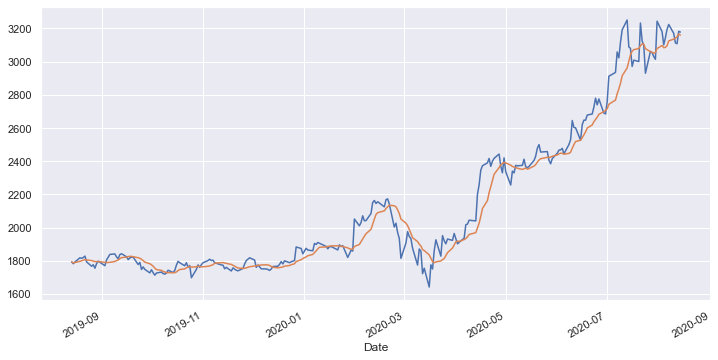

In [59]:
ns=stock['Open'].rolling(10, min_periods=1).mean()
stock["Open"].plot()
ns.plot()

In [68]:
stock.index.day_name().value_counts()

Tuesday      52
Thursday     52
Friday       51
Wednesday    51
Monday       48
Name: Date, dtype: int64

In [69]:
stock.index.dayofyear

Int64Index([226, 227, 228, 231, 232, 233, 234, 235, 238, 239,
            ...
            216, 217, 218, 219, 220, 223, 224, 225, 226, 227],
           dtype='int64', name='Date', length=254)

In [70]:
stock.index.weekofyear

<ipython-input-70-bfa3d8fceea2>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  stock.index.weekofyear


Int64Index([33, 33, 33, 34, 34, 34, 34, 34, 35, 35,
            ...
            32, 32, 32, 32, 32, 33, 33, 33, 33, 33],
           dtype='int64', name='Date', length=254)